In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf


In [2]:
folder_path = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'


In [3]:
#Checking number of spectrograms in each instrument folder

# Initialize dictionaries to store subfolder names and their corresponding spectrogram counts
subfolder_dict = {}
spectrogram_count_dict = {}

# Loop through all items in the directory
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        subfolder_dict[item] = item_path
        
        # Count the number of spectrogram images in the subfolder
        spectrogram_count = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
        spectrogram_count_dict[item] = spectrogram_count

# Print the subfolders and their corresponding spectrogram counts
for subfolder, count in spectrogram_count_dict.items():
    print(f"Subfolder '{subfolder}' contains {count} spectrogram images.")


Subfolder 'flute' contains 451 spectrogram images.
Subfolder 'guitar_acoustic' contains 637 spectrogram images.
Subfolder 'piano' contains 721 spectrogram images.
Subfolder 'trumpet' contains 577 spectrogram images.
Subfolder 'violin' contains 580 spectrogram images.


C:\Users\user\AppData\Local\Temp\ipykernel_16832\1466670906.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


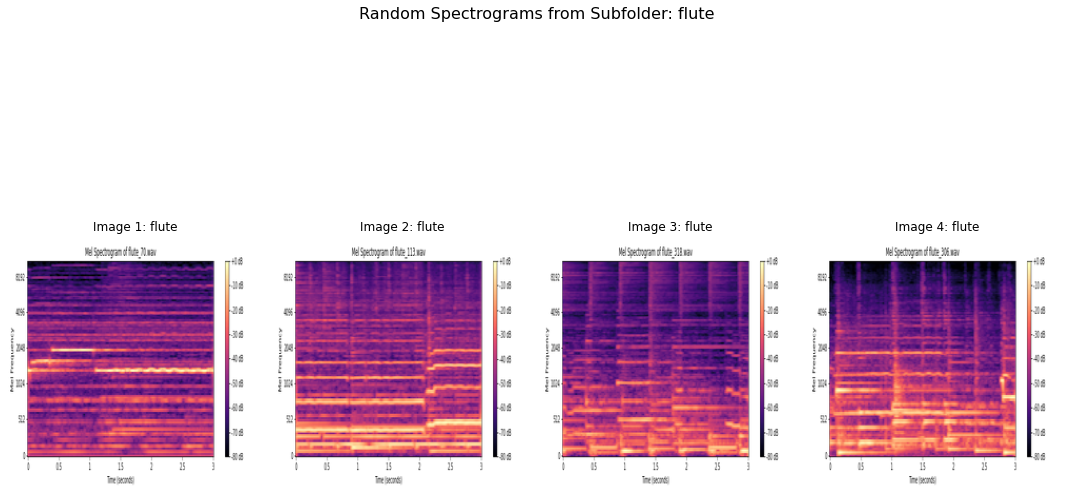

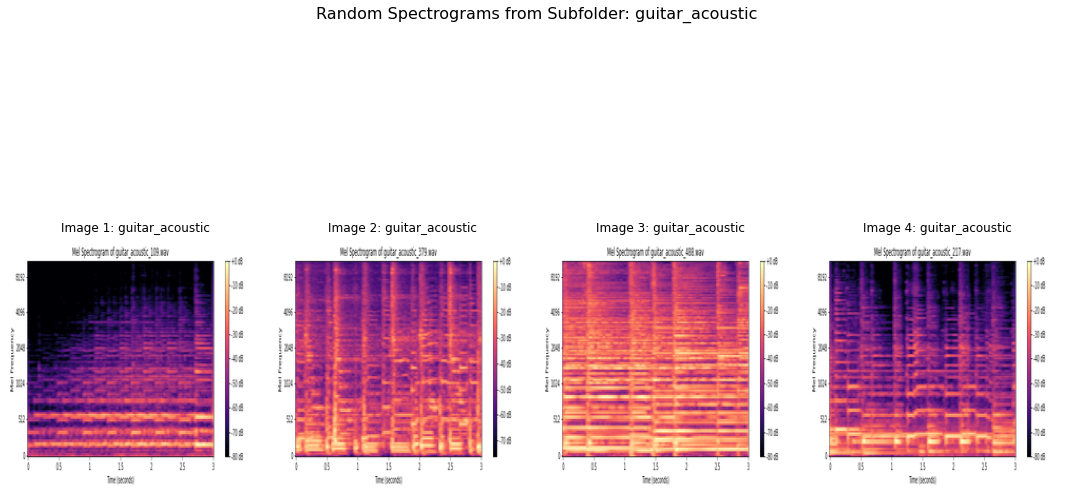

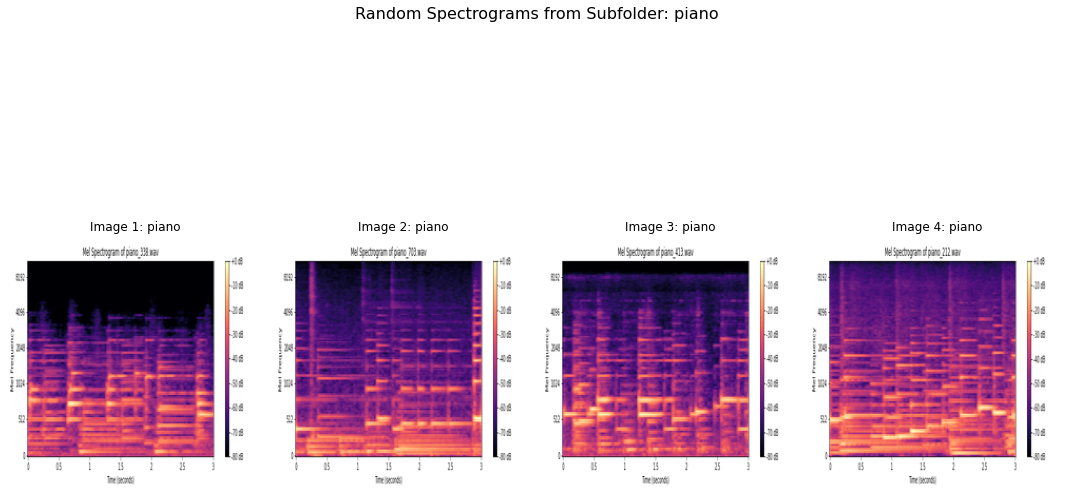

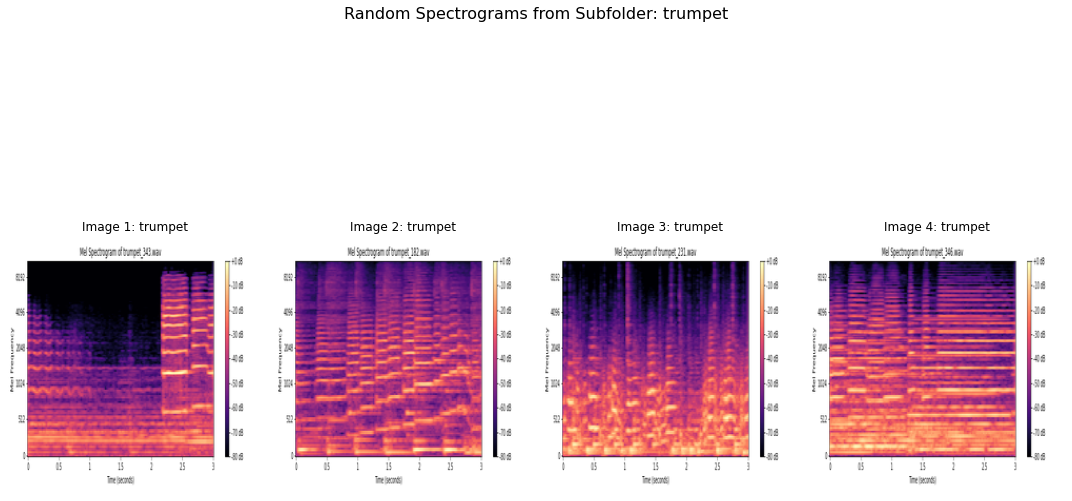

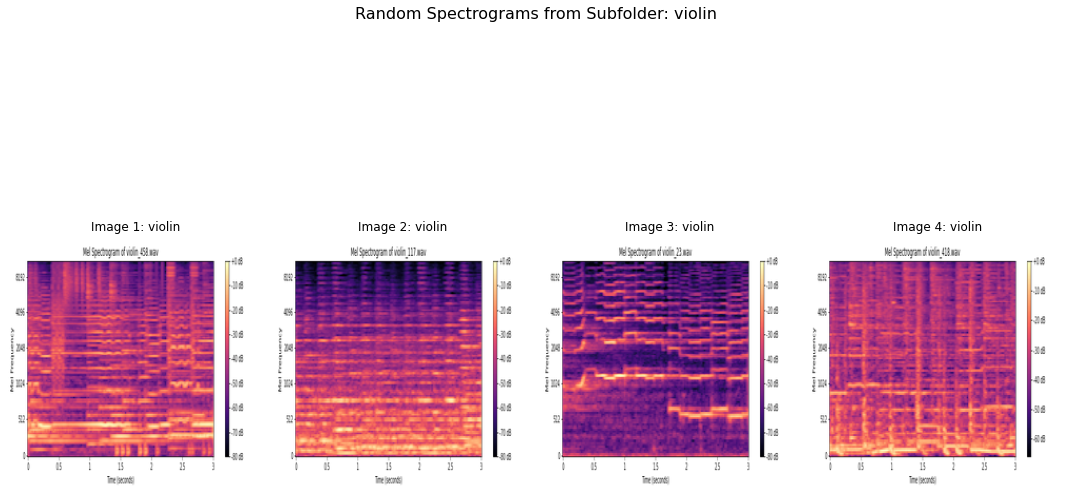

In [4]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Input folder containing the spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Target size for resizing the images
target_size = (244, 244)

# Function to resize and rename the image using only the subfolder name
def resize_and_rename_image(file_path, class_name):
    # Open the image using PIL
    img = Image.open(file_path)
    
    # Resize the image to the target size
    img_resized = img.resize(target_size, Image.ANTIALIAS)
    
    # Get only the subfolder name without any additional text
    new_file_name = class_name + ".png"
    
    return img_resized, new_file_name

# Dictionary to store subfolder names and their corresponding image paths
subfolder_dict = {}

# Loop through all items in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        subfolder_dict[item] = []
        class_name = item  # Get the subfolder name as the class name
        
        # Loop through all files in the subfolder
        for file_name in os.listdir(item_path):
            file_path = os.path.join(item_path, file_name)
            subfolder_dict[item].append(file_path)

# Function to randomly select 4 images from each subfolder and plot them
def plot_random_images(subfolder_dict):
    num_images_per_subfolder = 4
    
    for subfolder, file_paths in subfolder_dict.items():
        random_images = random.sample(file_paths, num_images_per_subfolder)
        
        plt.figure(figsize=(15, 10))
        plt.suptitle(f"Random Spectrograms from Subfolder: {subfolder}", fontsize=16)
        
        for i, image_path in enumerate(random_images, 1):
            img, new_file_name = resize_and_rename_image(image_path, subfolder)
            plt.subplot(1, num_images_per_subfolder, i)
            plt.imshow(img)
            plt.title(f"Image {i}: {subfolder}")
            plt.axis('off')
            plt.tight_layout()
        
        plt.show()

# Plot 4 random images from each subfolder along with their names
plot_random_images(subfolder_dict)


## Normalizing the spectrogram images

In [5]:
import os
import random
from PIL import Image

# Input folder containing the spectrograms
input_folder = 'C:\\Users\\user\\Desktop\\capstone\\spectrogram_images'

# Number of images to randomly select from each subfolder
num_images_per_subfolder = 400

# Target size for resizing
target_size = (244, 244)

# Function to randomly select images from each subfolder
def random_select_images(subfolder, file_paths, num_images):
    selected_images = random.sample(file_paths, min(num_images, len(file_paths)))
    return selected_images


# Create lists to store the images and their corresponding labels
images_list = []
labels_list = []

# Loop through all items in the input folder
for item in os.listdir(input_folder):
    item_path = os.path.join(input_folder, item)
    
    # Check if the item is a subfolder
    if os.path.isdir(item_path):
        class_name = item  # Get the subfolder name as the class name
        
        # Get all file paths in the subfolder
        file_paths = [os.path.join(item_path, file_name) for file_name in os.listdir(item_path)]
        
        # Randomly select 'num_images_per_subfolder' images from the subfolder
        selected_images = random_select_images(class_name, file_paths, num_images_per_subfolder)
        
        # Append the selected images to the images list
        for image_path in selected_images:
            img = Image.open(image_path)
            img = img.convert('RGB')  # Ensure RGB mode
            img = img.resize(target_size)  # Resize the image
        
            images_list.append(np.array(img))
            labels_list.append(class_name)

        # Print the subfolder name and the number of selected spectrograms
        print(f"Subfolder '{class_name}' contains {len(selected_images)} spectrograms (random {num_images_per_subfolder} selected).")

# Convert the lists to NumPy arrays for further processing
images_array = np.array(images_list)
labels_array = np.array(labels_list)

# Print the shapes of the arrays to verify their sizes
print("Shape of the images array:", images_array.shape)
print("Shape of the labels array:", labels_array.shape)


Subfolder 'flute' contains 400 spectrograms (random 400 selected).
Subfolder 'guitar_acoustic' contains 400 spectrograms (random 400 selected).
Subfolder 'piano' contains 400 spectrograms (random 400 selected).
Subfolder 'trumpet' contains 400 spectrograms (random 400 selected).
Subfolder 'violin' contains 400 spectrograms (random 400 selected).
Shape of the images array: (2000, 244, 244, 3)
Shape of the labels array: (2000,)


## Performing one hot encoding on class labels

In [6]:
from sklearn.preprocessing import LabelBinarizer
# Perform one-hot encoding on the class labels
label_binarizer = LabelBinarizer()
labels_one_hot = label_binarizer.fit_transform(labels_array)
print("Shape of the one-hot encoded labels:", labels_one_hot.shape)

Shape of the one-hot encoded labels: (2000, 5)


In [7]:
# Get the class names from the LabelBinarizer
class_names = label_binarizer.classes_

# Print the one-hot encoding values alongside their class names
for i in range(len(labels_array)):
    class_name = labels_array[i]
    one_hot_encoding = labels_one_hot[i]
    print(f"Class name: {class_name}, One-hot encoding: {one_hot_encoding}")


Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, One-hot encoding: [1 0 0 0 0]
Class name: flute, O

Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]


Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]
Class name: violin, One-hot encoding: [0 0 0 0 1]


## Spliting the data into training validation and testing

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
# First, split into training and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images_array, labels_one_hot, test_size=0.2, stratify=labels_one_hot, random_state=42
)

# Then, split the training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, stratify=train_labels, random_state=42
)

# Print the shapes of the arrays to verify their sizes
print("Training set shapes:")
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)

print("\nValidation set shapes:")
print("Validation images:", val_images.shape)
print("Validation labels:", val_labels.shape)

print("\nTest set shapes:")
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)


Training set shapes:
Train images: (1280, 244, 244, 3)
Train labels: (1280, 5)

Validation set shapes:
Validation images: (320, 244, 244, 3)
Validation labels: (320, 5)

Test set shapes:
Test images: (400, 244, 244, 3)
Test labels: (400, 5)


## Building the models

### CNN MODEL

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model
model = models.Sequential()

# Convolutional and pooling layers
model.add(layers.Conv2D(25, (3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))  # Assuming 5 classes

# Set the learning rate
learning_rate = 0.001  # You can adjust this value as needed

# Create an optimizer with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
batch_size = 32
epochs = 10 

history = model.fit(
    train_images, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping]  # Add the early stopping callback
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 25)      700       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 25)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 50)      11300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 100)       45100     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 100)      0

In [10]:
# Load and preprocess your test images and labels

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the test accuracy
print("Test accuracy:", test_accuracy)


13/13 [==============================] - 3s 238ms/step - loss: 0.0434 - accuracy: 0.9900
Test accuracy: 0.9900000095367432


## Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions on the test set
test_predictions = model.predict(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded labels to integer format
test_labels_integer = np.argmax(test_labels, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels_integer, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
report = classification_report(test_labels_integer, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)


13/13 [==============================] - 3s 235ms/step
Confusion Matrix:
[[77  0  0  0  3]
 [ 0 80  0  0  0]
 [ 0  0 80  0  0]
 [ 0  0  0 80  0]
 [ 1  0  0  0 79]]
Classification Report:
                 precision    recall  f1-score   support

          flute       0.99      0.96      0.97        80
guitar_acoustic       1.00      1.00      1.00        80
          piano       1.00      1.00      1.00        80
        trumpet       1.00      1.00      1.00        80
         violin       0.96      0.99      0.98        80

       accuracy                           0.99       400
      macro avg       0.99      0.99      0.99       400
   weighted avg       0.99      0.99      0.99       400



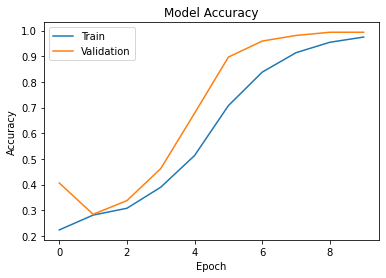

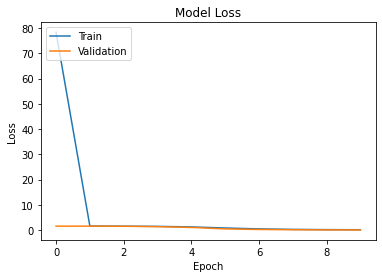

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [13]:


# Save the trained model to a file
model.save("my_cnn_model")


INFO:tensorflow:Assets written to: my_cnn_model\assets


INFO:tensorflow:Assets written to: my_cnn_model\assets


### ANN MODEL

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Define the ANN model
model = models.Sequential()

# Add dense (fully connected) layers
model.add(layers.Dense(200, activation='relu', input_shape=(244*244*3,)))  # Input shape based on your CNN's output shape
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))

# Add the output layer with appropriate activation for your problem
model.add(layers.Dense(5, activation='softmax'))  # Assuming 5 classes

# Set the learning rate
learning_rate = 0.001  # You can adjust this value as needed

# Create an optimizer with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
batch_size = 32
epochs = 10  # Increase the number of epochs to allow for early stopping

history = model.fit(
    train_images.reshape(-1, 244*244*3), train_labels,  # Reshape the images for ANN input
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(val_images.reshape(-1, 244*244*3), val_labels),  # Reshape the images for validation
    callbacks=[early_stopping]  # Add the early stopping callback
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               35721800  
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 5)                 255       
                                                                 
Total params: 35,747,205
Trainable params: 35,747,205
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
40/40 [==============================] - 9s 194ms/step - loss: 8230.5742 - accuracy: 0.2258 - val_loss: 3076.8770 - val_accuracy: 0.3750
Epoch 2/10
40/40 [========

In [15]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(
    test_images.reshape(-1, 244*244*3), test_labels
)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


13/13 [==============================] - 0s 21ms/step - loss: 47.9655 - accuracy: 0.8500
Test Loss: 47.96554183959961
Test Accuracy: 0.8500000238418579


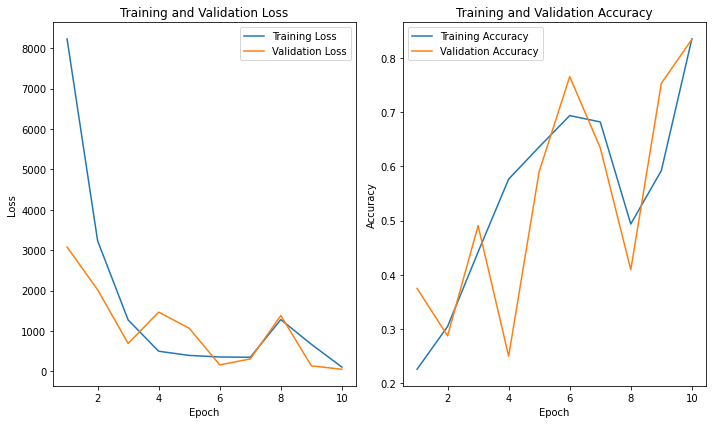

In [16]:
import matplotlib.pyplot as plt

# Get training history from the model.fit() function
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
model.save('my_ann_model')

INFO:tensorflow:Assets written to: my_ann_model\assets


INFO:tensorflow:Assets written to: my_ann_model\assets
